In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Essential tools for data analysis
import pandas as pd
import matplotlib.pyplot as plt

print("🎉 Tools loaded!")
print("Ready to explore medical data!")

🎉 Tools loaded!
Ready to explore medical data!


In [3]:
# Load the medical dataset
df = pd.read_csv('/Users/user/Desktop/python/data/raw/healthcare-dataset-stroke-data.csv')

print("📊 Dataset loaded successfully!")
print(f"Patients: {len(df)}")
print(f"Measurements per patient: {len(df.columns)}")

# Look at first 3 rows
df.head(3)

📊 Dataset loaded successfully!
Patients: 5110
Measurements per patient: 12


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [4]:
# Check dataset size
print("📏 DATASET SIZE")
print("=" * 15)

print(f"Shape: {df.shape}")
print(f"👥 {df.shape[0]} patients")
print(f"📋 {df.shape[1]} measurements each")

print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

📏 DATASET SIZE
Shape: (5110, 12)
👥 5110 patients
📋 12 measurements each

Column names:
 1. id
 2. gender
 3. age
 4. hypertension
 5. heart_disease
 6. ever_married
 7. work_type
 8. Residence_type
 9. avg_glucose_level
10. bmi
11. smoking_status
12. stroke


In [5]:
# What kind of data do we have?
print("🔍 DATA TYPES")
print("=" * 12)

# Quick overview
df.info()

print(f"\n📊 Summary:")
numbers = df.select_dtypes(include='number').columns
text = df.select_dtypes(include='object').columns
print(f"Number columns: {len(numbers)}")
print(f"Text columns: {len(text)}")

🔍 DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

📊 Summary:
Number columns: 7
Text columns: 5


In [6]:
# Statistics for all numbers
print("📈 BASIC STATISTICS")
print("=" * 18)

df.describe()

📈 BASIC STATISTICS


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Count categories
print("🏷️ PATIENT CATEGORIES")
print("=" * 20)

# Gender
print("👥 Gender:")
print(df['gender'].value_counts())

# Stroke cases  
print("\n🧠 Stroke cases:")
print(df['stroke'].value_counts())
stroke_rate = df['stroke'].mean() * 100
print(f"Stroke rate: {stroke_rate:.1f}%")

# Smoking
print("\n🚬 Smoking:")
print(df['smoking_status'].value_counts())

🏷️ PATIENT CATEGORIES
👥 Gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

🧠 Stroke cases:
stroke
0    4861
1     249
Name: count, dtype: int64
Stroke rate: 4.9%

🚬 Smoking:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [8]:
# Look for missing information
print("🕵️ MISSING DATA CHECK")
print("=" * 20)

missing = df.isnull().sum()
print("Missing values per column:")
print(missing)

# Show only columns with missing data
has_missing = missing[missing > 0]
if len(has_missing) > 0:
    print("\n⚠️ Columns with gaps:")
    for col, count in has_missing.items():
        pct = (count/len(df))*100
        print(f"  {col}: {count} ({pct:.1f}%)")
else:
    print("\n✅ No missing data!")

🕵️ MISSING DATA CHECK
Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

⚠️ Columns with gaps:
  bmi: 201 (3.9%)


🎨 CREATING CHARTS


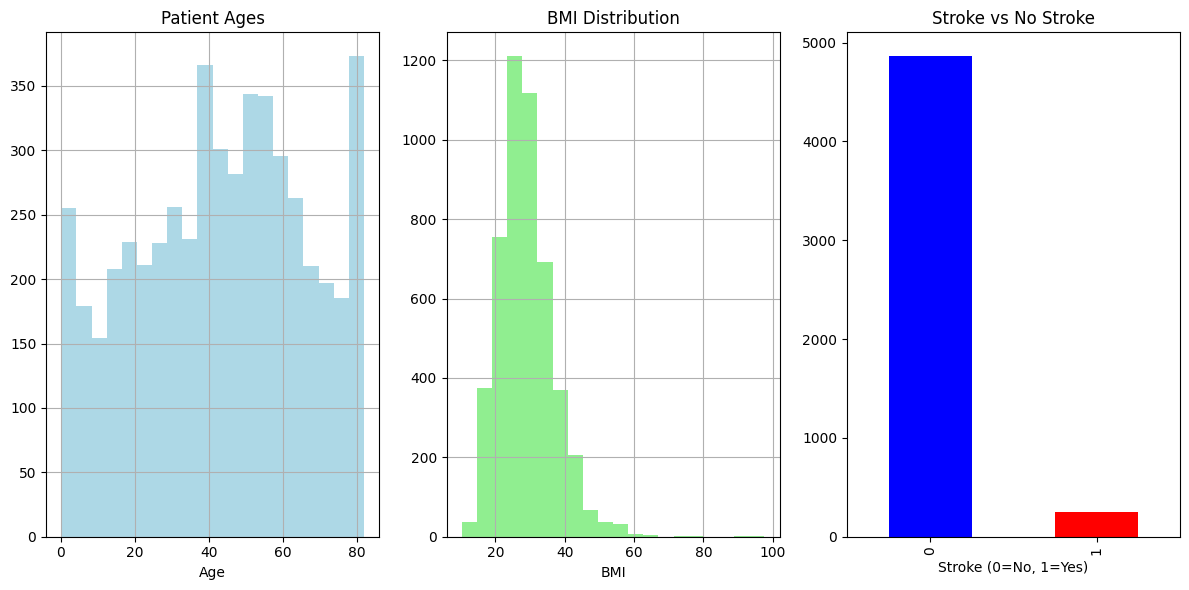

In [9]:
# Create basic charts
import matplotlib.pyplot as plt

print("🎨 CREATING CHARTS")
plt.figure(figsize=(12, 6))

# Age distribution
plt.subplot(1, 3, 1)
df['age'].hist(bins=20, color='lightblue')
plt.title('Patient Ages')
plt.xlabel('Age')

# BMI distribution
plt.subplot(1, 3, 2)
df['bmi'].hist(bins=20, color='lightgreen')
plt.title('BMI Distribution')
plt.xlabel('BMI')

# Stroke cases
plt.subplot(1, 3, 3)
df['stroke'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Stroke vs No Stroke')
plt.xlabel('Stroke (0=No, 1=Yes)')

plt.tight_layout()
plt.savefig('/Users/user/Desktop/python/outputs/fig/plot.png')
plt.show()

In [10]:
# Check for suspicious values
print("🚨 DATA QUALITY CHECK")
print("=" * 20)

# Age check
print("👶 Age range:")
print(f"  Min age: {df['age'].min()}")
print(f"  Max age: {df['age'].max()}")

# BMI check
print("\n⚖️ BMI range:")
print(f"  Min BMI: {df['bmi'].min():.1f}")
print(f"  Max BMI: {df['bmi'].max():.1f}")

# Glucose check
print("\n🍬 Glucose range:")
print(f"  Min: {df['avg_glucose_level'].min():.0f} mg/dL")
print(f"  Max: {df['avg_glucose_level'].max():.0f} mg/dL")

# Summary
print(f"\n✅ Data looks medically reasonable!")

🚨 DATA QUALITY CHECK
👶 Age range:
  Min age: 0.08
  Max age: 82.0

⚖️ BMI range:
  Min BMI: 10.3
  Max BMI: 97.6

🍬 Glucose range:
  Min: 55 mg/dL
  Max: 272 mg/dL

✅ Data looks medically reasonable!


In [11]:
# Final summary of our exploration
print("📋 EXPLORATION SUMMARY")
print("=" * 20)

print(f"📊 Dataset: {len(df)} patients, {len(df.columns)} features")
print(f"🎯 Target: Predict stroke (currently {df['stroke'].mean()*100:.1f}% have strokes)")
print(f"👥 Age range: {df['age'].min():.0f} to {df['age'].max():.0f} years")
print(f"⚖️ BMI range: {df['bmi'].min():.1f} to {df['bmi'].max():.1f}")

missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
if len(missing_cols) > 0:
    print(f"⚠️ Missing data in: {list(missing_cols.index)}")
else:
    print(f"✅ No missing data")

print(f"\n🎉 First data exploration complete!")
print(f"🧹 Next: Clean and prepare data for analysis")

📋 EXPLORATION SUMMARY
📊 Dataset: 5110 patients, 12 features
🎯 Target: Predict stroke (currently 4.9% have strokes)
👥 Age range: 0 to 82 years
⚖️ BMI range: 10.3 to 97.6
⚠️ Missing data in: ['bmi']

🎉 First data exploration complete!
🧹 Next: Clean and prepare data for analysis
